(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
0


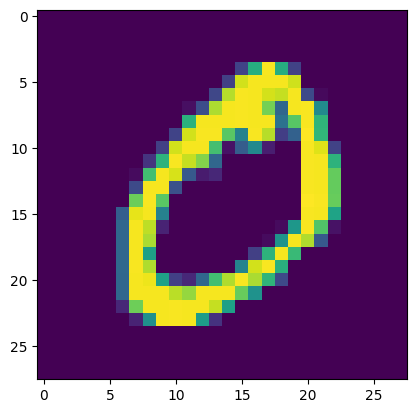

(60000, 32, 32)
(10000, 32, 32)
(60000, 32, 32, 1)
(10000, 32, 32, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                  

INFO:tensorflow:Assets written to: complexMNIST\assets


INFO:tensorflow:Assets written to: complexMNIST\assets


INFO:tensorflow:Assets written to: C:\Users\Sam\AppData\Local\Temp\tmp_79rhhp6\assets


INFO:tensorflow:Assets written to: C:\Users\Sam\AppData\Local\Temp\tmp_79rhhp6\assets


428524

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import datetime

'''Program to compile and save a complex model of MNIST digit'''
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = np.pad(x_train,((0,0),(2,2),(2,2)),'constant',constant_values=0)
x_test = np.pad(x_test,((0,0),(2,2),(2,2)),'constant',constant_values=0)

x_train = x_train.astype('float32')

x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(x_train.shape[0],32,32,1)
x_test = x_test.reshape(x_test.shape[0],32,32,1)

model =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 6, kernel_size = (3,3), padding = 'valid', activation = tf.nn.relu, input_shape = (32,32,1)),
    tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'valid', activation = tf.nn.relu),
    tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 120, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 84, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)
])

model.summary()

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

start_time = datetime.datetime.now()

model.fit(x = x_train,
          y = y_train,
          batch_size = 64,
          epochs = 10)

end_time = datetime.datetime.now()
time_cost = end_time - start_time
print("time cost = ",time_cost)

tf.keras.models.save_model(model,'complexMNIST')
model.save('complexMNIST.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True

tflite_model = converter.convert()

open('complexMNIST.tflite', 'wb').write(tflite_model)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import datetime

'''Program to compile and save a simple model of MNIST digit'''
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()


x_train = np.pad(x_train,((0,0),(2,2),(2,2)),'constant',constant_values=0)
x_test = np.pad(x_test,((0,0),(2,2),(2,2)),'constant',constant_values=0)

x_train = x_train.astype('float32')

x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(x_train.shape[0],32,32,1)
x_test = x_test.reshape(x_test.shape[0],32,32,1)

model =  tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 1)),
    tf.keras.layers.Dense(124, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(124, activation=tf.nn.relu),
    tf.keras.layers.Dense(496, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.summary()

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

start_time = datetime.datetime.now()

model.fit(x = x_train,
          y = y_train,
          batch_size = 64,
          epochs = 10)

end_time = datetime.datetime.now()
time_cost = end_time - start_time
print("time cost = ",time_cost)

tf.keras.models.save_model(model,'simpleMNIST')
model.save('simpleMNIST.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True

tflite_model = converter.convert()

open('simpleMNIST.tflite', 'wb').write(tflite_model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 124)               127100    
                                                                 
 dense_1 (Dense)             (None, 10)                1250      
                                                                 
 dense_2 (Dense)             (None, 124)               1364      
                                                                 
 dense_3 (Dense)             (None, 496)               62000     
                                                                 
 dense_4 (Dense)             (None, 10)                4970      
                                                                 
Total params: 196,684
Trainable params: 196,684
Non-trai

789948

In [4]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy.misc
import os

'''Program to save the MNIST images'''
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
x_train = np.pad(x_train,((0,0),(2,2),(2,2)),'constant',constant_values=0)
x_train = x_train/255
print(x_train.shape)

save_dir = './images/'
if os.path.exists(save_dir) is False:
    os.makedirs(save_dir)
for i in range(1000):
    image = x_train[i]
    file = save_dir+'mnist_train_%d.jpg' % i
    Image.fromarray((image*255).astype('uint8'), mode='L').convert('L').save(file)

(60000, 28, 28)
(60000, 32, 32)


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

'''Evaluating with the train images the models'''

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_test = np.pad(x_test,((0,0),(2,2),(2,2)),'constant',constant_values=0)
x_test = x_test/255
x_test = x_test.reshape(x_test.shape[0],32,32,1)

model = keras.models.load_model('complexMNIST.h5')

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

model = keras.models.load_model('simpleMNIST.h5')
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 3ms/step - loss: 0.0307 - accuracy: 0.9886
Test score: 0.030729681253433228
Test accuracy: 0.9886000156402588
313/313 [==============================] - 1s 3ms/step - loss: 0.1080 - accuracy: 0.9736
Test score: 0.10795608907938004
Test accuracy: 0.9735999703407288
